[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-01-apt-output)


# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : 
    * 공공데이터 포털 : https://www.data.go.kr/data/15061057/fileData.do
    * 수업과 같은 데이터로 실습하기 위해 아래 링크의 데이터로 실습하는 것을 권장합니다.
    * 데이터셋 다운로드(구글드라이브) : http://bit.ly/open-data-set-folder
    * 데이터셋 다운로드(드랍박스) : https://bit.ly/dropbox-open-data-set


### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
import os
# os.walk 를 통해 특정 폴더 안의 파일을 읽어옵니다.
for root, dirs, files in os.walk("data"):
    print(files)

['주택도시보증공사_전국 평균 분양가격(2019년 12월).csv']


In [2]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

`## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [3]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949", engine="python")
df_last.shape

(4335, 5)

In [4]:
# head 로 파일을 미리보기 합니다.

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
# tail 로도 미리보기를 합니다.

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 데이터 요약하기

In [6]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [ ]:
True == 1

True

In [ ]:
False == 0

True

In [ ]:
True + True + False

2

In [7]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [8]:
# isnull 을 통해 결측치를 구합니다.

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [9]:
# isna 를 통해 결측치를 구합니다.

df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [10]:
type(np.nan)

float

In [11]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [12]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

In [13]:
# 제거가 잘 되었는지 확인 합니다.
df_last.head(1)

,지역명,연도,월,분양가격
0,서울,2015,10,5841.0


In [14]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 135.6+ KB


## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정

In [15]:
#데이터 시각화를 위한 폰트설치, 
#해당 셀 실행 - 상단 바 - 런타임 - 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

In [16]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

<Axes: xlabel='지역명'>

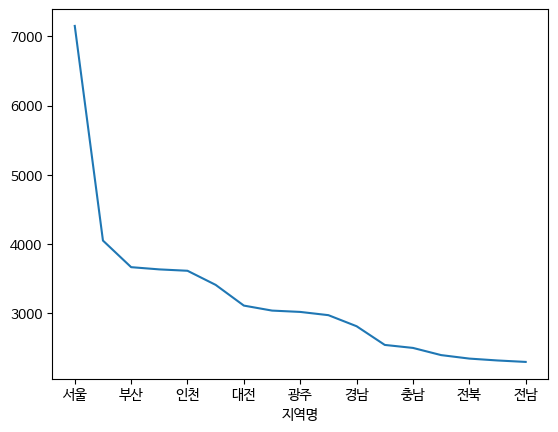

In [17]:
g = df_last.groupby(["지역명"])["분양가격"].mean().sort_values(ascending=False)
g.plot()

<Axes: xlabel='지역명'>

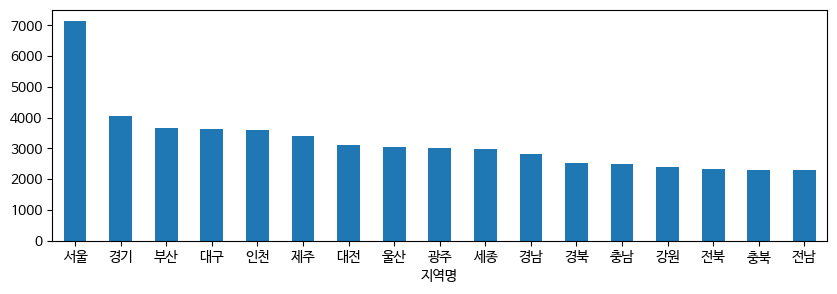

In [18]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g.plot.bar(rot=0, figsize=(10, 3))

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

<Axes: xlabel='지역명'>

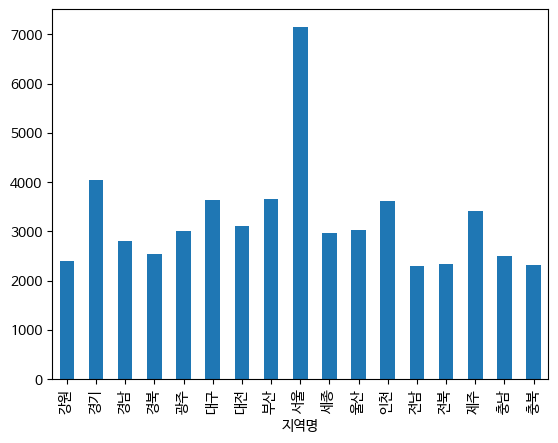

In [21]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["지역명"])["분양가격"].mean().plot.bar()

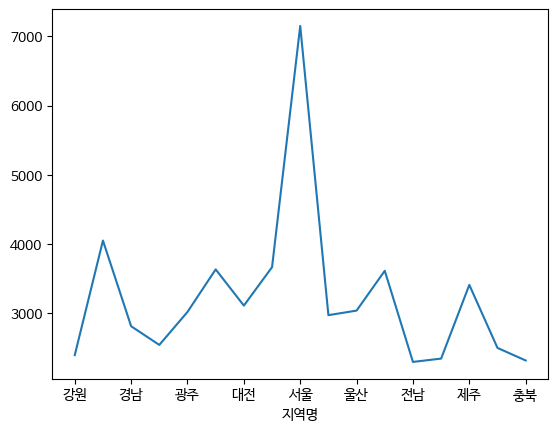

In [22]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# 연도에 소숫점이 생기지 않게 표시하고자 한다면 ax.xaxis.set_major_locator를 사용해서 integer로 설정합니다.
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
df_last.groupby(["지역명"])["분양가격"].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

### Seaborn 으로 시각화 해보기

In [23]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='지역명', ylabel='분양가격'>

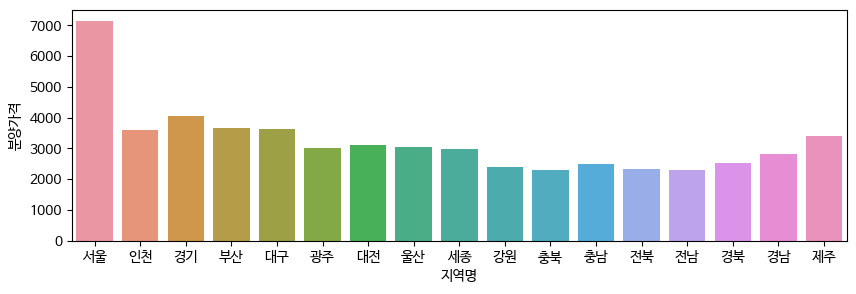

In [25]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10, 3))
sns.barplot(data=df_last, x="지역명", y="분양가격", ci=None)

<Axes: xlabel='연도', ylabel='분양가격'>

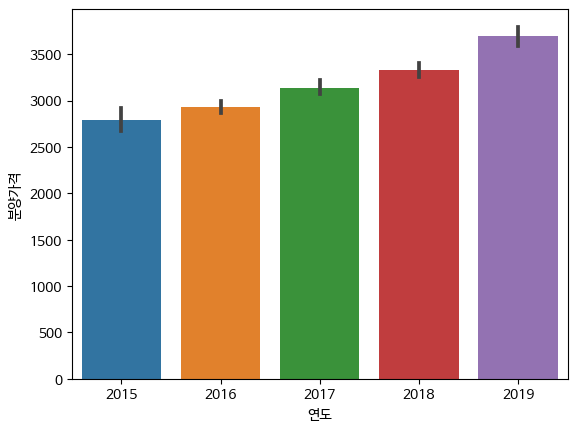

In [26]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data=df_last, x="연도", y="분양가격")

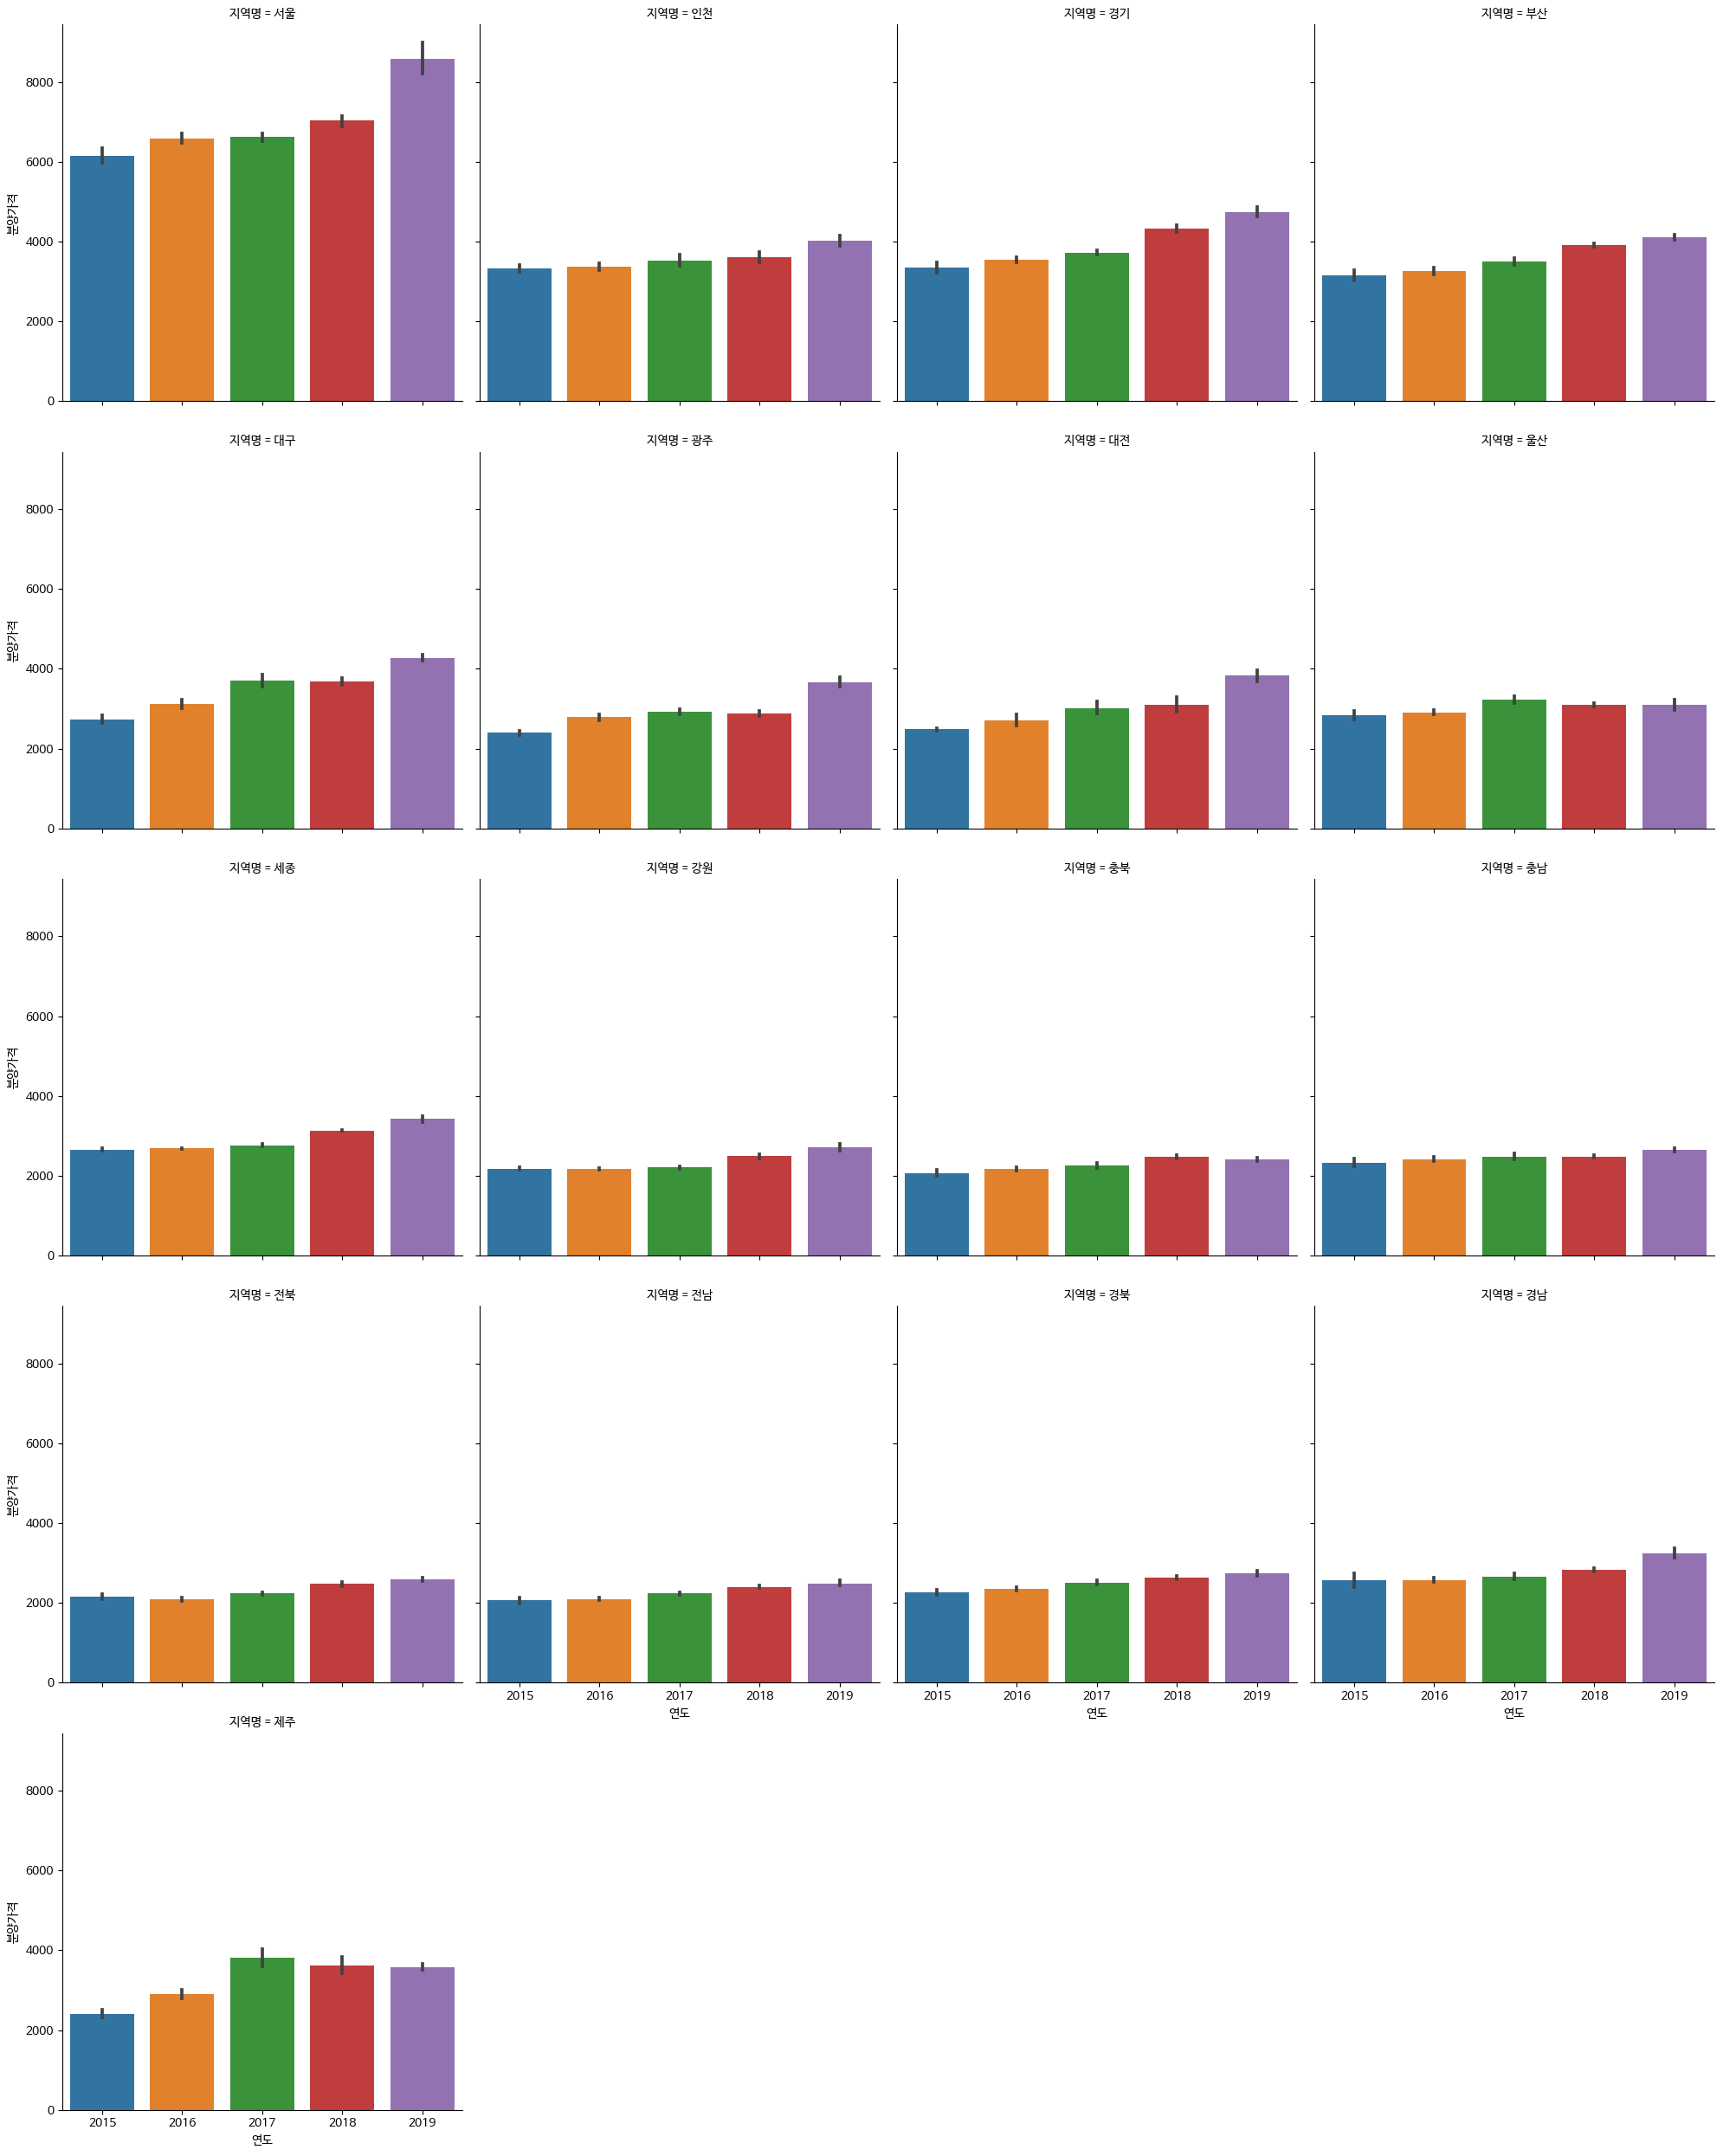

In [27]:
sns.catplot(data=df_last, x="연도", y="분양가격", kind="bar", col="지역명", col_wrap=4)

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

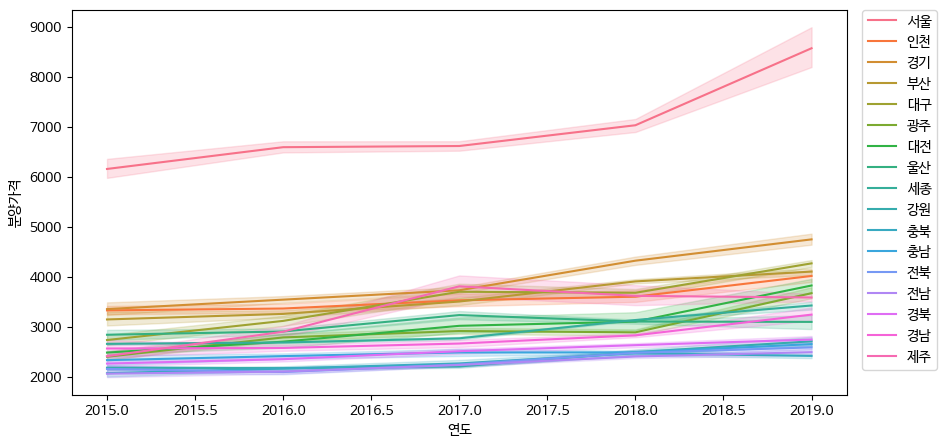

In [28]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

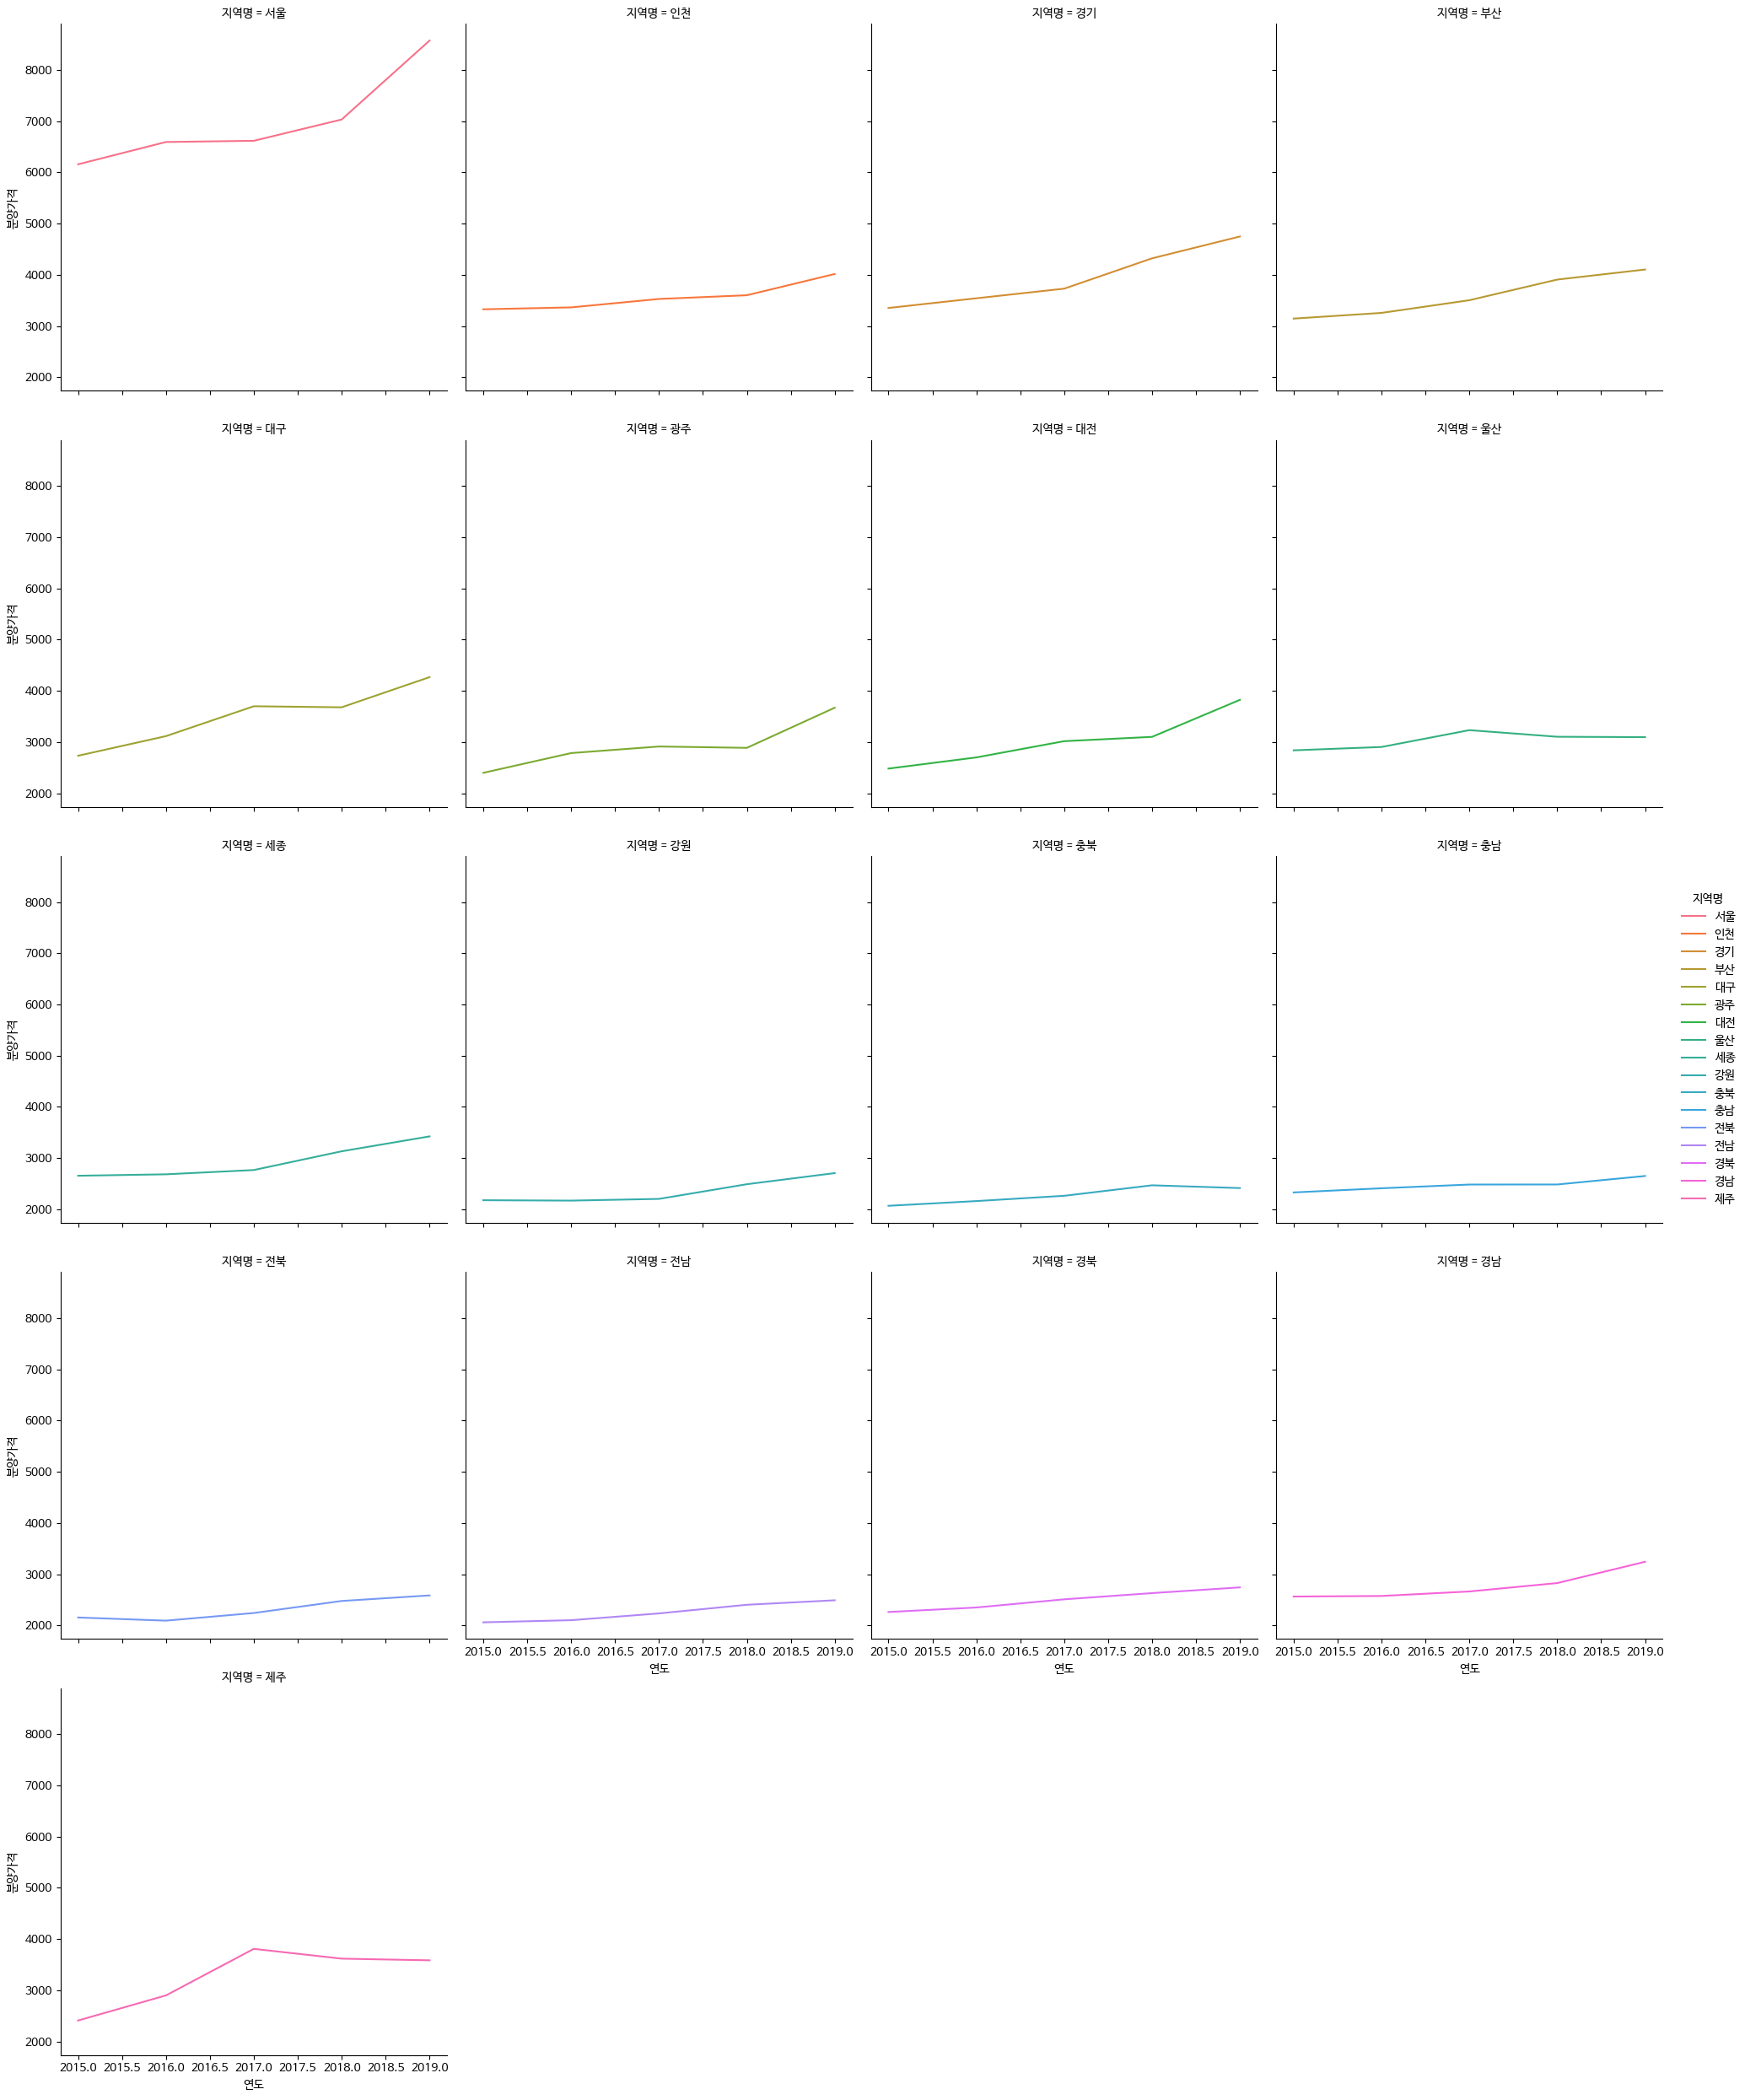

In [29]:
sns.relplot(data=df_last, x="연도", y="분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

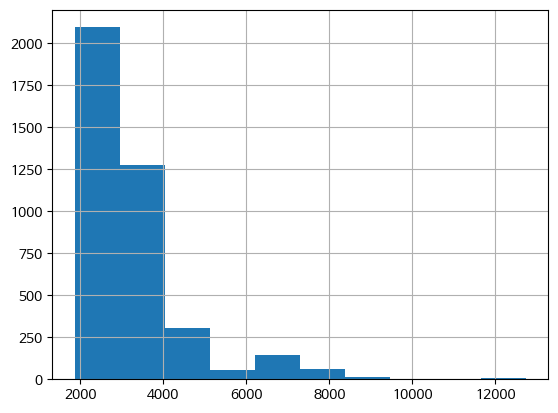

In [32]:
h = df_last["분양가격"].hist(bins=10)

In [34]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]
price = df_last.loc[df_last["분양가격"].notnull(), "분양가격"]

<Axes: xlabel='분양가격', ylabel='Density'>

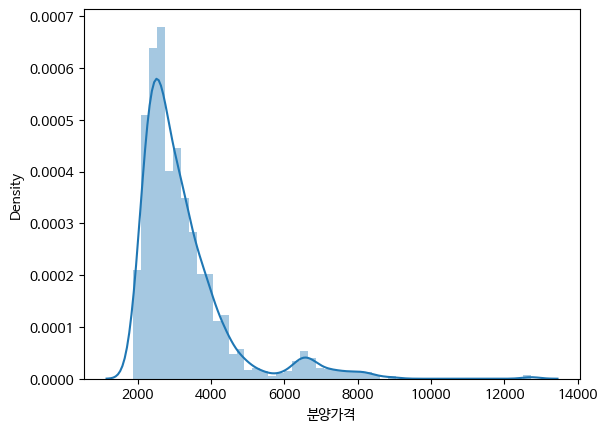

In [35]:
# distplot으로 평당분양가격을 표현해 봅니다.

sns.distplot(price)

<Axes: xlabel='분양가격', ylabel='Density'>

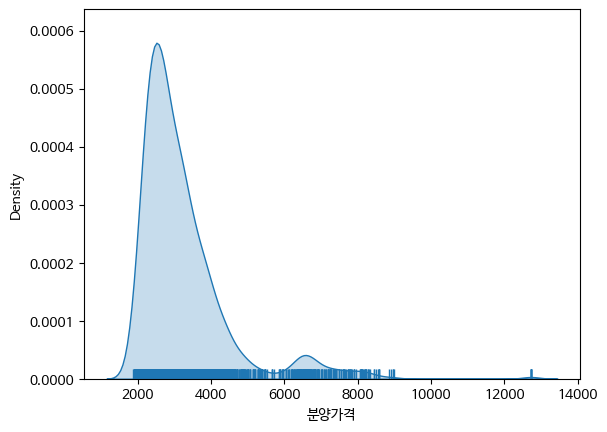

In [36]:
# sns.distplot(price, hist=False, rug=True)
sns.kdeplot(price, shade=True)
sns.rugplot(price)

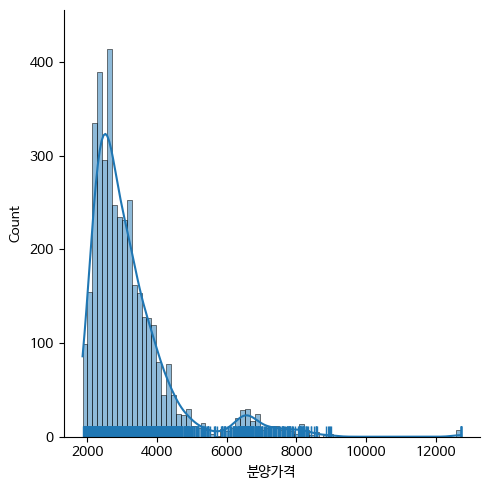

In [37]:
sns.displot(price, kde=True, rug=True)